# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [10]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")


# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn


In [5]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot: xlabel='Age', ylabel='Tardies'>

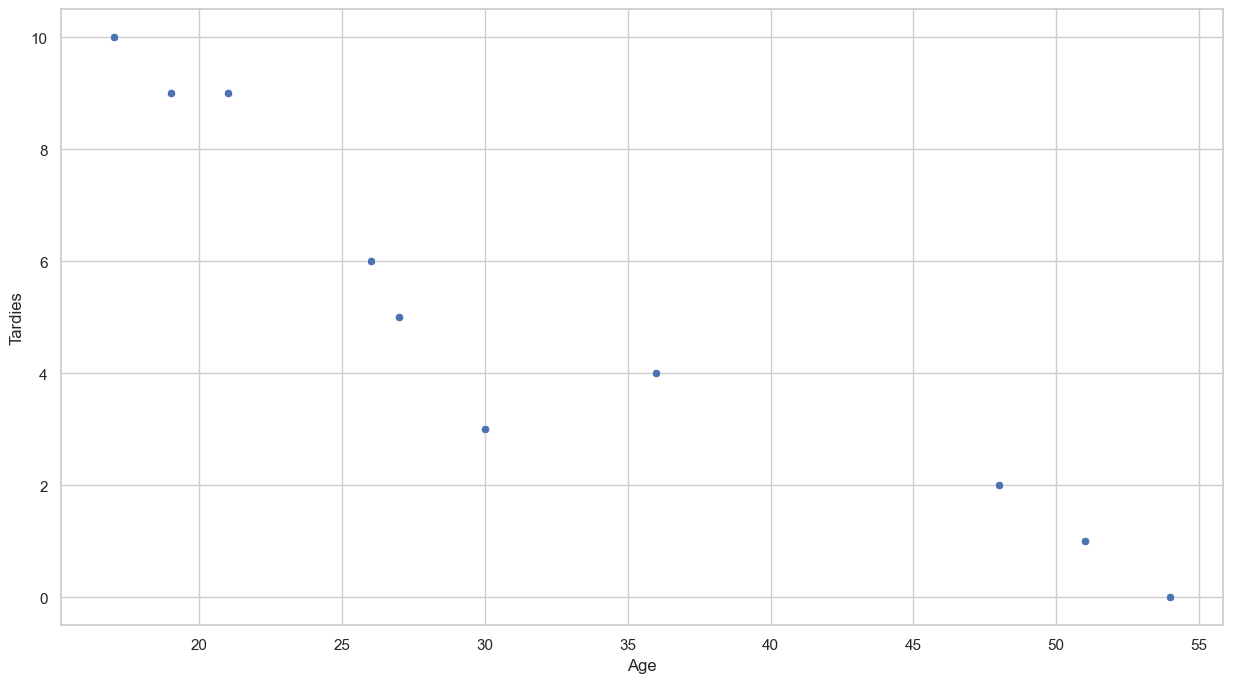

In [7]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

In [17]:
lr = LinearRegression()

In [20]:
lr.fit(
    X = student_data[["Age"]], # These are the variables of control
    y = student_data.Tardies # This is the variable we will be observing
)

LinearRegression()

In [21]:
lr.intercept_

12.888803363135771

In [22]:
lr.coef_

array([-0.24282077])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [9]:
# After plotting the data we are able to have some first inferences about the relationship of tardiness in relation to age.
# At first glance it seems that there is a negative correlation between age and tardiness in which as the ages increases, the tardiness decreases



Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.`

In [ ]:
#Both covariance and correlation helps us measure the relationship between two variables. 

#The difference is that the covarience will tell you how much this two variables change together (the strength of the relationship)
    # while correlation will tell you the scale and direction of the relationship. 

In [14]:
corr = np.corrcoef(student_data.Age,student_data.Tardies)
corr[0,1] # student_data is very negative correlated

-0.9391626886887122

In [16]:
covar = np.cov(student_data.Age,student_data.Tardies)[0,1]
covar 

-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [31]:
# Your response here.

student_data["prediction_equation"] = lr.coef_[0] * student_data.Age + lr.intercept_
student_data 

,Age,Tardies,prediction_equation
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [35]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()

In [36]:
results.summary()

C:\Users\danid\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        16:00:10   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R-square level indicates that the Tardiness of student can be explained by their age. 
#p-value < than 0.05 indicates we have enough evidence to reject H0 (the null hypothesis). 
    #In other words the results of the analysis is statistically significant
#the negative coef indicates that for each 'unit' of tardiness, the age decreases by 0.24

In [ ]:
# IN SUM: we can confidently say that the Age of the student is strongly related to how late they are to class 

Plot your regression model on your scatter plot.

In [37]:
results.predict()

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

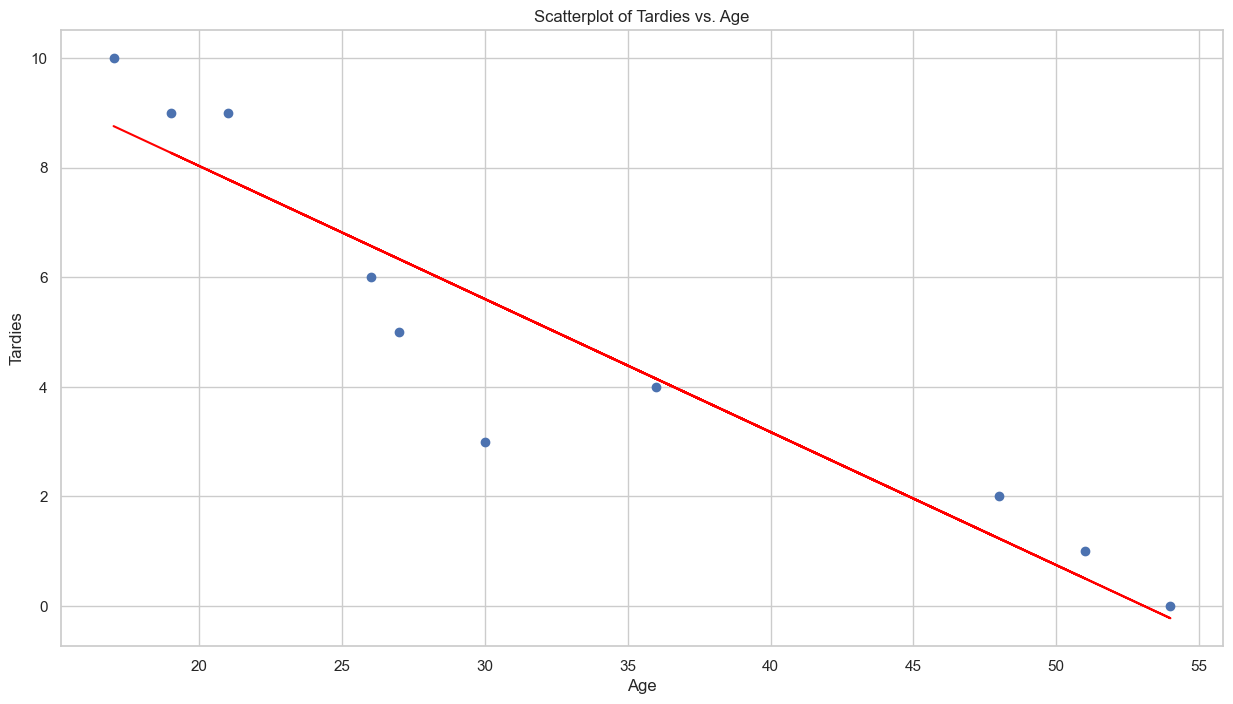

In [38]:
# Create a scatterplot of the data
plt.scatter(student_data["Age"], student_data["Tardies"])

# Add the regression line to the plot
plt.plot(student_data["Age"], results.predict(), color="red")

# Add labels and a title to the plot
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Scatterplot of Tardies vs. Age")

# Show the plot
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [40]:
from sklearn import metrics

In [42]:
mae = metrics.mean_absolute_error(student_data.Tardies, results.predict())
mse = metrics.mean_squared_error(student_data.Tardies, results.predict())
rmse = np.sqrt(mse)

r2 = metrics.r2_score(student_data.Tardies, results.predict())

In [43]:
rmse

1.154088464865509

In [45]:
# to interpret the result of the model we will look at two things: the Error (RMSE) and the R2

        #R2 = 0.88 > indicates that the Age is a relevant predictor of tardiness
        #RMSE = 1.154088464865509 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [50]:
# Import any libraries you may need & the data

ve = pd.read_csv('vehicles.csv')
ve.head()



,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [54]:
ve['Fuel Type'].value_counts()

Regular                        23587
Premium                         9921
Gasoline or E85                 1195
Diesel                           911
Premium or E85                   121
Midgrade                          74
CNG                               60
Premium and Electricity           20
Gasoline or natural gas           20
Premium Gas or Electricity        17
Regular Gas and Electricity       16
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [66]:
ve.columns = ve.columns.str.replace('-', '_')
ve.columns = ve.columns.str.replace('/', '_')
ve

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [68]:
# Your response here. 

result = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=ve).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                             16:35:25   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
#Although all variables can significantly explain the levels of CO2 emissions, 
#Fuel barrels/year, combined MPG and Cylinders are the most relevant metrics. 



## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [70]:
df = pd.DataFrame({'invited': [1, 3, 4,6,8,9,11,14], 'attended': [1, 2, 4,4,5,7,8,13]})
df

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [73]:
results = smf.ols("invited ~ attended", data=df).fit()
results.summary()

C:\Users\danid\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                invited   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           0.000102
Time:                        16:46:40   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
attended       1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

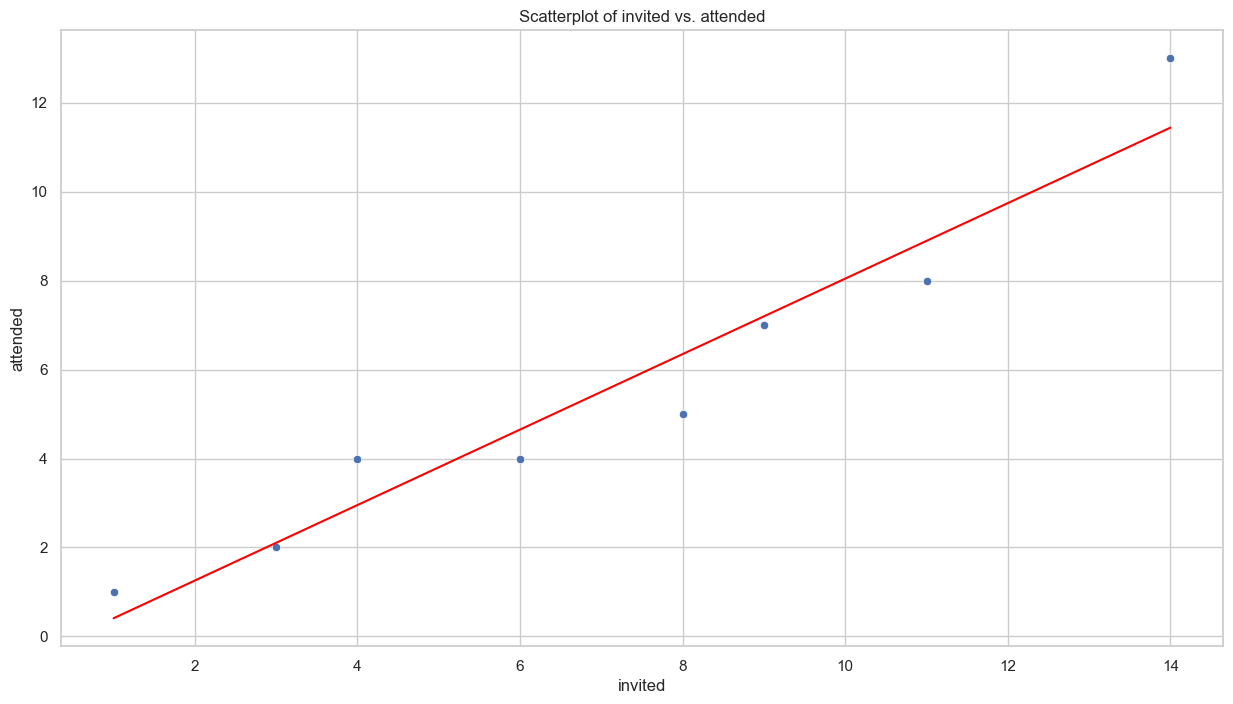

In [87]:
sns.scatterplot(x=df.invited, y=df.attended)

# Add the regression line to the plot
plt.plot(df["invited"], df['prediction'], color="red")

# Add labels and a title to the plot
plt.xlabel("invited")
plt.ylabel("attended")
plt.title("Scatterplot of invited vs. attended")

# Show the plot
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [86]:
df

,invited,attended,prediction
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


In [78]:
lr = LinearRegression()

In [83]:
lr.fit(
X = df[['invited']], 
y= df['attended'])

LinearRegression()

In [85]:
df['prediction']= lr.coef_[0] * df.invited + lr.intercept_

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [94]:
df["error"] = (df.attended - df.prediction).abs()

df

,invited,attended,prediction,error
0,1,1,0.409091,0.590909
1,3,2,2.106061,0.106061
2,4,4,2.954545,1.045455
3,6,4,4.651515,0.651515
4,8,5,6.348485,1.348485
5,9,7,7.196970,0.196970
6,11,8,8.893939,0.893939
7,14,13,11.439394,1.560606


In [106]:
df.sort_values(by=['error'], inplace=True)
df

,invited,attended,prediction,error
1,3,2,2.106061,0.106061
5,9,7,7.196970,0.196970
0,1,1,0.409091,0.590909
3,6,4,4.651515,0.651515
6,11,8,8.893939,0.893939
2,4,4,2.954545,1.045455
4,8,5,6.348485,1.348485
7,14,13,11.439394,1.560606


In [112]:
df_2 = df[:-2]
df_2

,invited,attended,prediction,error
1,3,2,2.106061,0.106061
5,9,7,7.196970,0.196970
0,1,1,0.409091,0.590909
3,6,4,4.651515,0.651515
6,11,8,8.893939,0.893939
2,4,4,2.954545,1.045455


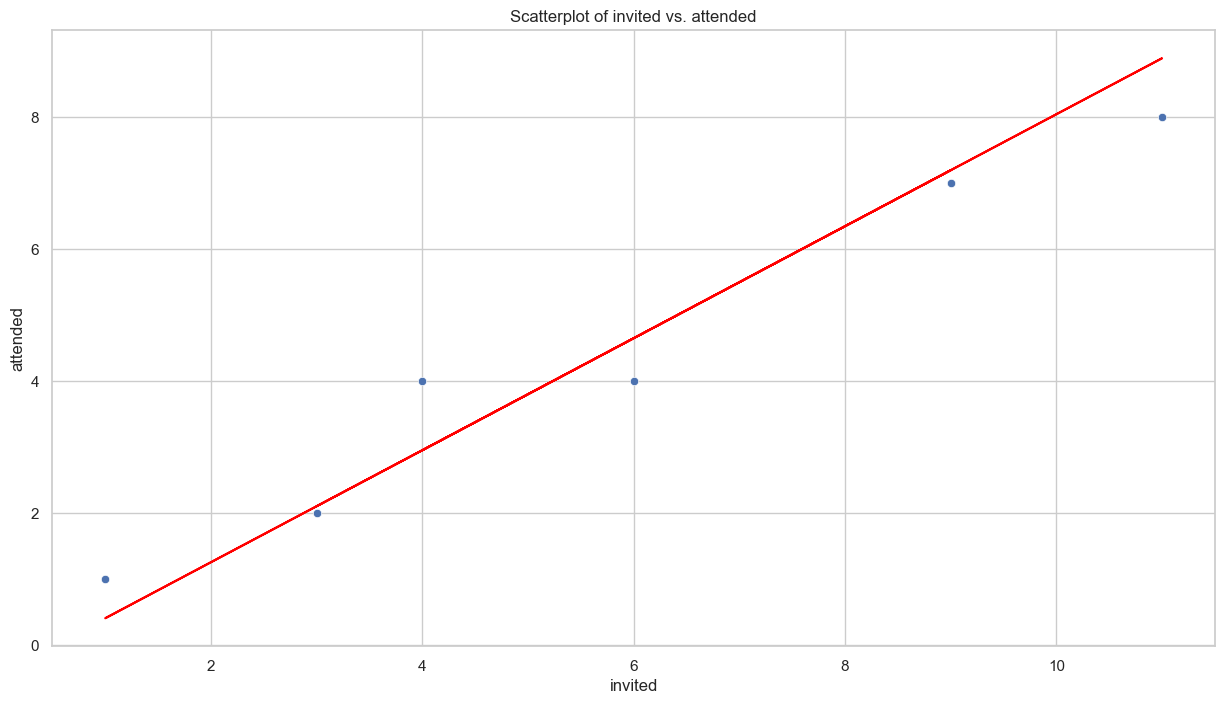

In [113]:
sns.scatterplot(x=df_2.invited, y=df_2.attended)

# Add the regression line to the plot
plt.plot(df_2["invited"], df_2['prediction'], color="red")

# Add labels and a title to the plot
plt.xlabel("invited")
plt.ylabel("attended")
plt.title("Scatterplot of invited vs. attended")

# Show the plot
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [116]:
# By removing the outliers the regression model becomes more accurate that is the regression models is more fitted to the data. 